In [1]:
import importlib
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import funciones_auxiliares_hito_2 as aux2

warnings.filterwarnings("ignore")
sns.set_style()
plt.rcParams["figure.figsize"] = (20, 10)

# Modelacion

## Carga de datos de entrenamiento y validacion

- En este caso, se optimizaran los modelos utilizando PCA en las variables independientes y utilizando SMOTE en los vectores objetivos

In [2]:
train_problema_1, train_problema_2 = aux2.preprocesar_todo_prueba_2_machine_learning(
    "input/2009_1perc.csv"
)
test_problema_1, test_problema_2 = aux2.preprocesar_todo_prueba_2_machine_learning(
    "input/2010_1perc.csv"
)

#####################################################
X_train_problema_1 = train_problema_1.drop(columns="arstmade")
X_test_problema_1 = test_problema_1.drop(columns="arstmade")

dif_1_problema_1, dif_2_problema_1 = aux2.obtener_difs_columnas(
    X_train_problema_1, X_test_problema_1
)

X_train_problema_1 = X_train_problema_1.drop(columns=dif_1_problema_1)
X_test_problema_1 = X_test_problema_1.drop(columns=dif_2_problema_1)

y_train_problema_1 = train_problema_1["arstmade"]
y_test_problema_1 = test_problema_1["arstmade"]
######################################################
#####################################################
X_train_problema_2 = train_problema_2.drop(columns="arstmade")
X_test_problema_2 = test_problema_2.drop(columns="arstmade")

dif_1_problema_2, dif_2_problema_2 = aux2.obtener_difs_columnas(
    X_train_problema_2, X_test_problema_2
)

X_train_problema_2 = X_train_problema_2.drop(columns=dif_1_problema_2)
X_test_problema_2 = X_test_problema_2.drop(columns=dif_2_problema_2)

y_train_problema_2 = train_problema_2["arstmade"]
y_test_problema_2 = test_problema_2["arstmade"]
######################################################


['perobs']
[]


## Optimizacion

### SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

oversampler_problema_1 = SMOTE(random_state=1, sampling_strategy="minority")

X_train_problema_1, y_train_problema_1 = oversampler_problema_1.fit_resample(
    X_train_problema_1, y_train_problema_1
)

oversampler_problema_2 = SMOTE(random_state=1, sampling_strategy="minority")
X_train_problema_2, y_train_problema_2 = oversampler_problema_2.fit_resample(
    X_train_problema_2, y_train_problema_2
)


In [6]:
y_train_problema_1.value_counts()


0    4355
1    4355
Name: arstmade, dtype: int64

In [7]:
y_train_problema_2.value_counts()


0    4355
1    4355
Name: arstmade, dtype: int64

- Se puede ver un aumento en la cantidad de clases 1, tanto en el problema 1 y el problema 2

## Redeclaracion de grillas y modelos, y entrenamiento

In [8]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Problema 1 - Prediccion de Arresto

In [9]:
grilla_logistic_problema_1 = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

grilla_naive_bayes_problema_1 = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "fit_prior": [True, False],
}


grilla_gradient_boosting_problema_1 = {
    "max_depth": range(5, 11),
    "learning_rate": [0.001, 0.01, 0.1, 1],
}


modelo_logistic_problema_1 = GridSearchCV(
    LogisticRegression(),
    grilla_logistic_problema_1,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)


modelo_naive_bayes_problema_1 = GridSearchCV(
    MultinomialNB(), grilla_naive_bayes_problema_1, cv=5, scoring="accuracy", n_jobs=-1
)

modelo_gradient_boosting_problema_1 = GridSearchCV(
    GradientBoostingClassifier(),
    grilla_gradient_boosting_problema_1,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

### Problema 2 - Detencion Violenta

In [10]:
grilla_logistic_problema_2 = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

grilla_naive_bayes_problema_2 = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "fit_prior": [True, False],
}

grilla_gradient_boosting_problema_2 = {
    "max_depth": range(5, 11),
    "learning_rate": [0.001, 0.01, 0.1, 1],
}

grilla_arbol_clasificacion_problema_2 = {
    "max_depth": range(3, 11),
    "max_leaf_nodes": range(1, 6),
    "criterion": ["gini", "entropy"],
}

grilla_random_forest_problema_2 = {
    "max_depth": range(5, 11),
    "n_estimators": range(500, 1001, 100),
    "max_features": ["sqrt", "log2"],
}


modelo_logistic_problema_2 = GridSearchCV(
    LogisticRegression(),
    grilla_logistic_problema_2,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

modelo_naive_bayes_problema_2 = GridSearchCV(
    MultinomialNB(), grilla_naive_bayes_problema_2, cv=5, scoring="accuracy", n_jobs=-1
)

modelo_gradient_boosting_problema_2 = GridSearchCV(
    GradientBoostingClassifier(),
    grilla_gradient_boosting_problema_2,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

modelo_arbol_problema_2 = GridSearchCV(
    DecisionTreeClassifier(),
    grilla_arbol_clasificacion_problema_2,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

modelo_random_forest_problema_2 = GridSearchCV(
    RandomForestClassifier(), grilla_random_forest_problema_2, cv=5, scoring="accuracy", n_jobs=-1
)

## Entrenamiento de todos los modelos

### Problema 1 - Prediccion de Arresto

--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


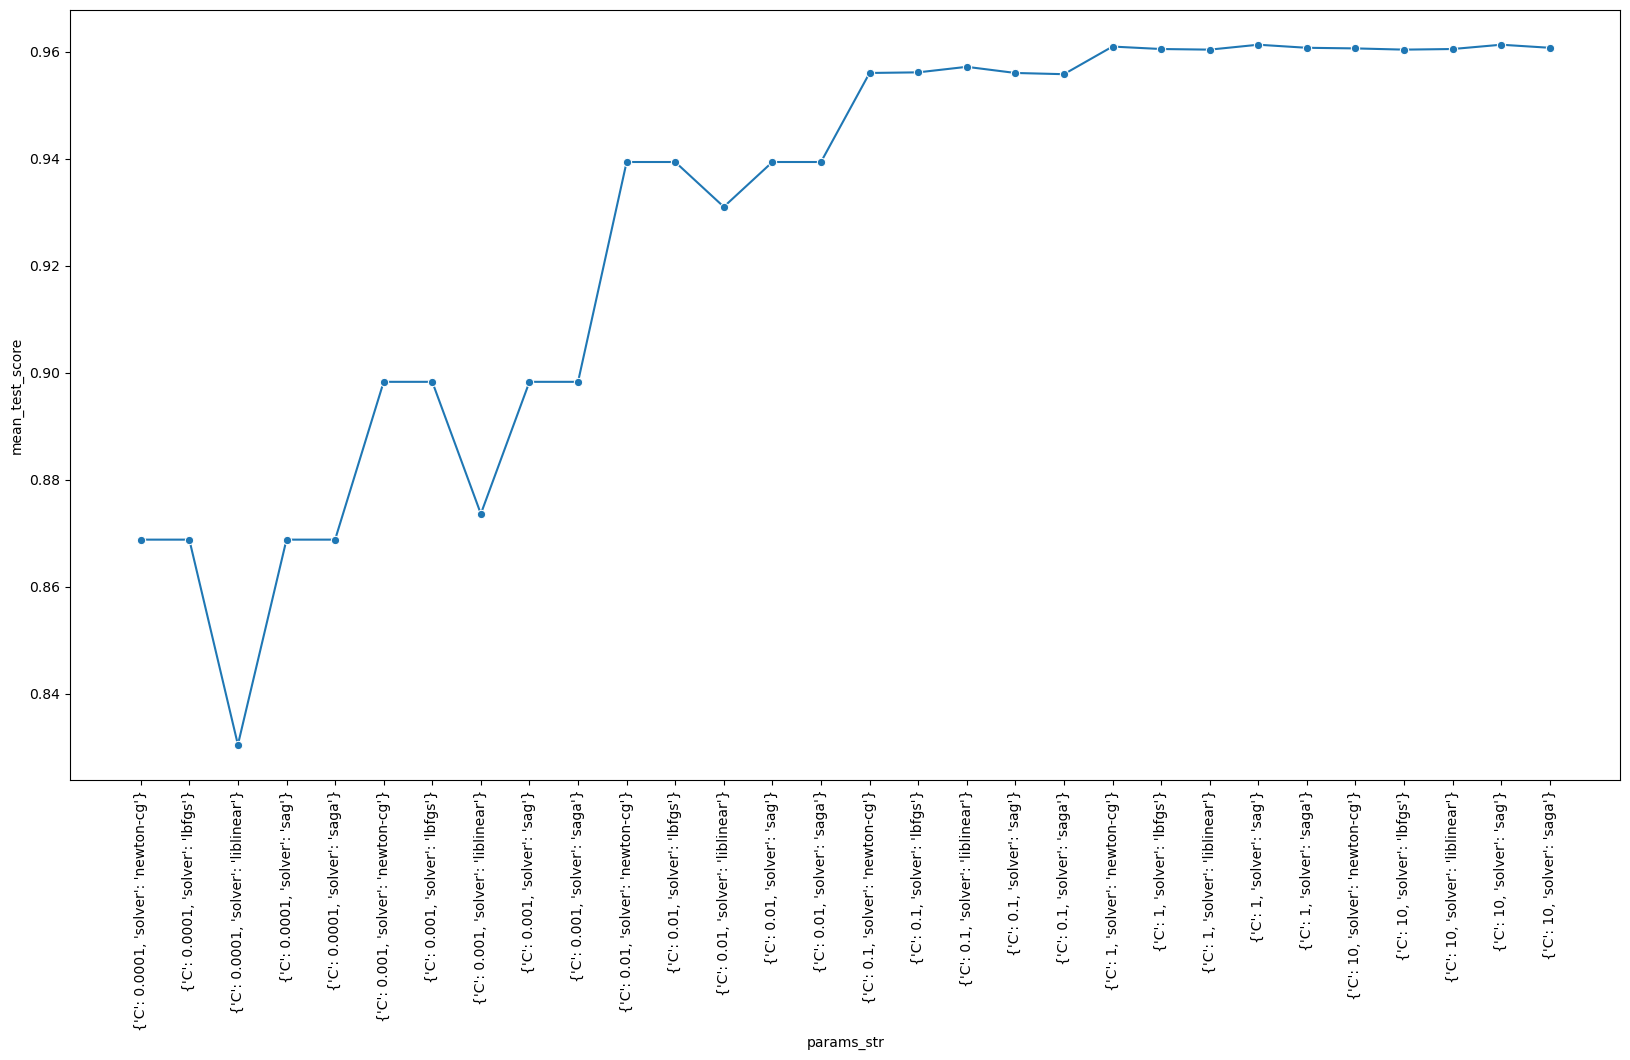

Los mejores parametros fueron: {'C': 1, 'solver': 'sag'}
El mejor desempeno fue: 0.961308840413318


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4438
           1       0.59      0.62      0.60       309

    accuracy                           0.95      4747
   macro avg       0.78      0.79      0.79      4747
weighted avg       0.95      0.95      0.95      4747

El ROC fue de: 0.7941899249056762
---------------------------------------------------------------------


In [11]:
modelo_logistic_problema_1.fit(X_train_problema_1, y_train_problema_1)
resultados_logistic_problema_1 = aux2.obtener_desempeno_modelo_en_grilla(
    modelo_logistic_problema_1, X_test_problema_1, y_test_problema_1
)

--------------Resultados Conjunto de Entrenamiento-----------------
Los resultados en la busqueda de hiperparametros son:


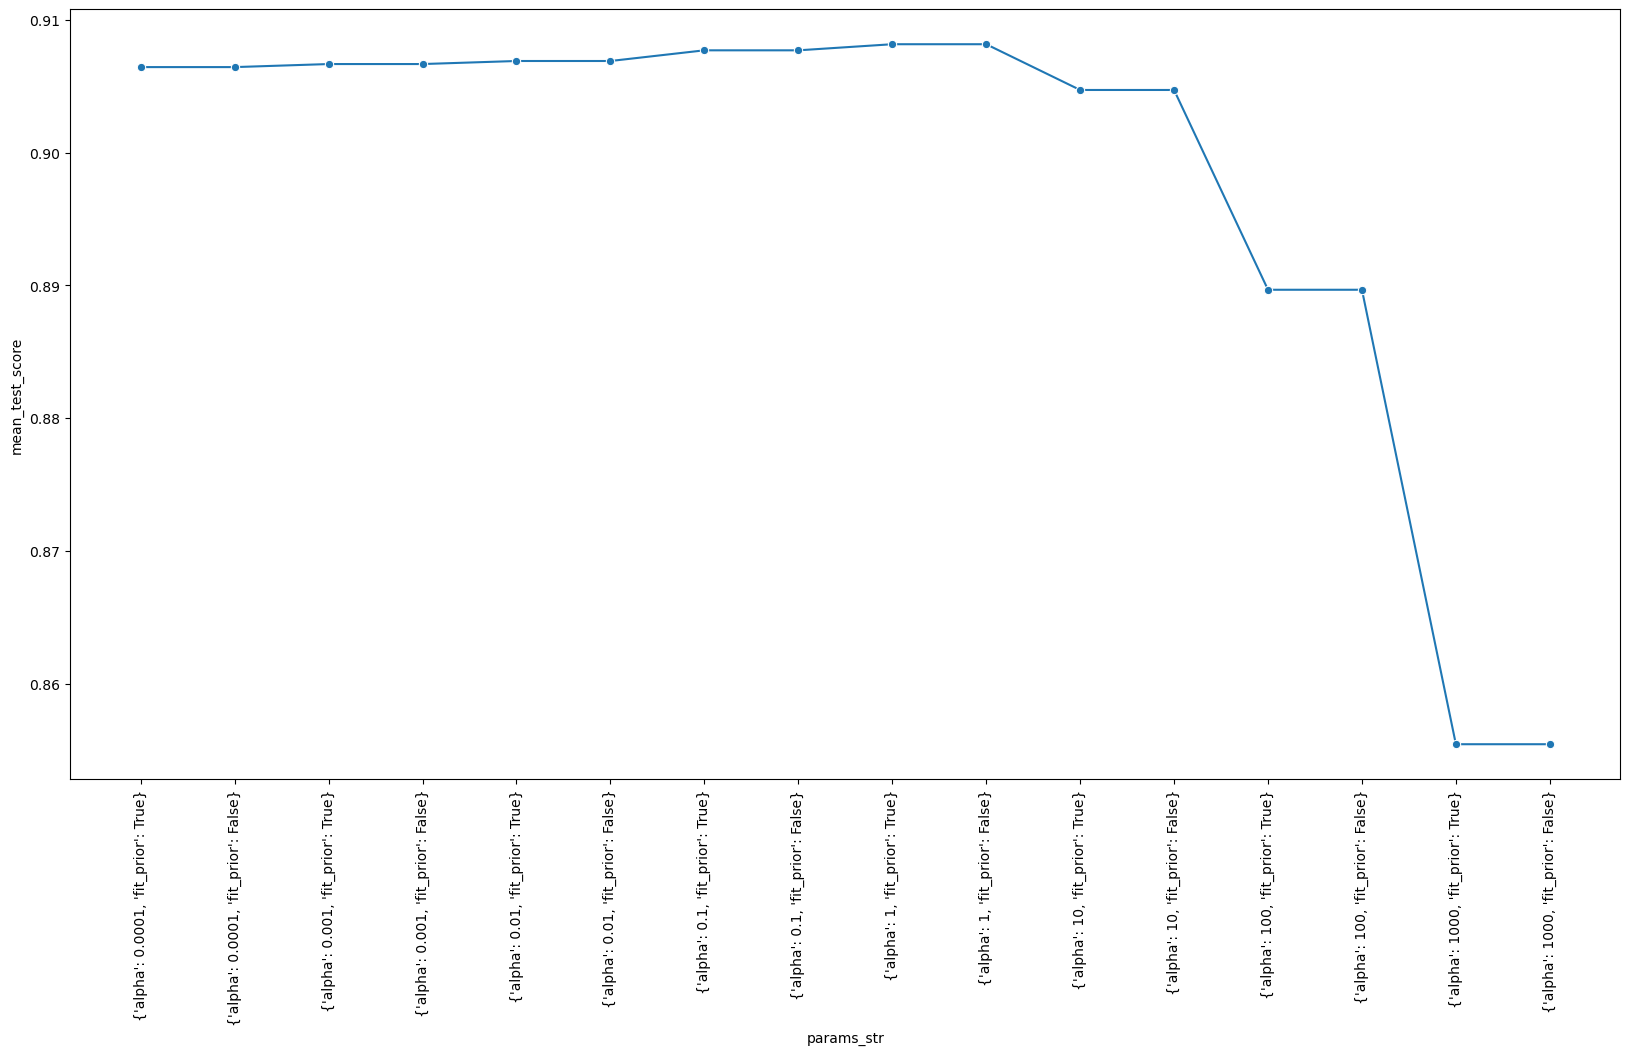

Los mejores parametros fueron: {'alpha': 1, 'fit_prior': True}
El mejor desempeno fue: 0.9081515499425947


--------------Resultados Conjunto de Validacion-----------------
Los resultados en el conjunto de validacion son:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4438
           1       0.49      0.63      0.55       309

    accuracy                           0.93      4747
   macro avg       0.73      0.79      0.76      4747
weighted avg       0.94      0.93      0.94      4747

El ROC fue de: 0.7942814410993028
---------------------------------------------------------------------


In [12]:
modelo_naive_bayes_problema_1.fit(X_train_problema_1, y_train_problema_1)
resultados_naive_bayes_problema_1 = aux2.obtener_desempeno_modelo_en_grilla(
    modelo_naive_bayes_problema_1, X_test_problema_1, y_test_problema_1
)

### Problema 2 - Detencion Violenta

In [13]:
modelo_naive_bayes_problema_2.fit(X_problema_2_train, y_problema_2_train)
resultados_naive_bayes_problema_2 = aux2.obtener_desempeno_modelo_en_grilla(
    modelo_naive_bayes_problema_2, X_problema_2_test, y_problema_2_test
)


NameError: name 'X_problema_2_train' is not defined

# Reporte comparativo de desempenos

- En el Hito 2 se reportaron los desempenos de cada uno de los modelos ya entrenados. Esto se realizo
tanto para el conjunto de entrenamiento y el conjunto de validacion. En la siguiente tabla se
recopila a modo de resumen los resultados.

- En este caso se reportara tambien el f1-score de la clase 1 para cada problema. Esto, ya que es
la clase de mayor interes para cada problema

## Problema 1 - Prediccion de Arresto

|Modelo|Entrenamiento Accuracy|Validacion F1 Clase 1|Validacion Accuracy|Validacion ROC|
|------|----------------------|---------------------|-------------------|--------------|
|Logistico|0.97|0.75|0.97|0.82|
|Naive Bayes|0.96|0.69|0.96|0.86|
|Gradient Boosting|0.97|0.95|0.99|0.96|




## Problema 2 - Detencion Violenta

|Modelo|Entrenamiento Accuracy|Validacion F1 Clase 1|Validacion Accuracy|Validacion ROC|
|------|----------------------|---------------------|-------------------|--------------|
|Logistico|0.77|0.26|0.77|0.57|
|Naive Bayes|0.76|0.39|0.76|0.61|
|Gradient Boosting|0.76|0.65|0.87|0.74|
|Arbol de Clasificacion|0.76|0.26|0.76|0.56|
|Random Forest|0.77|0.37|0.81|0.62|

# Exportacion de Mejores Modelos

Teniendo en cuenta los resultados anteriores, los mejores modelos son el modelo de regresion
logistica y naive bayes. Por lo tanto, ambos seran exportados para validacion externa.

In [ ]:
modelos_a_exportar = {
    "javier_rojas-modelo-1.pickle": modelos["modelo_gradient_boosting_problema_1"],
    "javier_rojas-modelo-2.pickle": modelos["modelo_gradient_boosting_problema_2"],
}

In [ ]:
for archivo, modelo in modelos_a_exportar.items():
    with open(archivo, "wb") as file:
        pickle.dump(modelo, file)